In [34]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from sklearn.utils import shuffle

In [35]:
def plot_hist(hist):
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model history")
    plt.ylabel("value")
    plt.xlabel("epoch")
    plt.legend(["train", "val", "train loss", "val loss"], loc="upper left")
    plt.show()


In [36]:
test_size = 100
x_train, y_train = np.load("x_train50x50.npz")['arr_0'], np.load("y_train50x50.npz")['arr_0']
x_train, y_train = shuffle(x_train, y_train)
x_test, y_test = x_train[-test_size:], y_train[-test_size:]
x_train, y_train = x_train[:-test_size], y_train[:-test_size]
x_train = x_train
x_test = x_test
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((9100, 50, 50, 3), (9100, 5), (100, 50, 50, 3), (100, 5))

In [37]:
# classifications = ['cpp_go_left', 'cpp_go_right', 'cpp_notgo', 'cpp_onlygo', 'cpp_onlyleft', 'cpp_onlyright', 'cpp_stop_line', 'cpp_stop_pic', 'notleft_sign', 'notright_pic', 'notstop_pic']classifications = ['no_right', 'no_stop', 'only_right', 'stop_line', 'stop_pic']
classifications = ['no_right', 'no_stop', 'only_right', 'stop_line', 'stop_pic']
len(classifications)

5

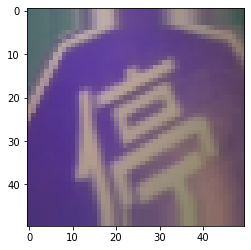

stop_pic


In [38]:
datagen = ImageDataGenerator(
    rescale = 1.0/255.0,
    featurewise_center=True,
    featurewise_std_normalization=True,
    channel_shift_range=10,
    shear_range=0.2,
    zoom_range=0.2,
    rotation_range=30,
)

data = datagen.flow(x_train, y_train, batch_size=64)

n = 2
plt.imshow(data[n][0][0])
plt.show()
print(classifications[np.where(data[n][1][0]==1)[0][0]])

In [39]:
model = None
model = Sequential([
    layers.Input(shape=(50, 50, 3)),
    # layers.BatchNormalization(),
    
    layers.Conv2D(1024, kernel_size=(3, 3), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    
    layers.Conv2D(64, kernel_size=(2, 2), padding='same', activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    
    layers.Flatten(),
    layers.Dense(512, activation='sigmoid'),
    layers.Dense(256, activation='sigmoid'),
    layers.Dense(len(classifications), activation='softmax'),
])

model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 50, 50, 1024)      28672     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 25, 25, 1024)     0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 25, 25, 64)        262208    
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 9216)              0         
                                                                 
 dense_27 (Dense)            (None, 512)              

Epoch 1/20


/var/folders/hl/fxxy2d3156l2j0q01gfmm_y00000gn/T/ipykernel_63650/4107486625.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(data,  epochs=20, verbose=1,
2022-08-28 13:27:57.543277: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


143/143 [==============================] - ETA: 0s - loss: 0.2350 - accuracy: 0.7209

2022-08-28 13:28:44.135417: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


143/143 [==============================] - 47s 327ms/step - loss: 0.2350 - accuracy: 0.7209 - val_loss: 0.1488 - val_accuracy: 0.8200
Epoch 2/20
143/143 [==============================] - 46s 320ms/step - loss: 0.0735 - accuracy: 0.9370 - val_loss: 0.0630 - val_accuracy: 0.9400
Epoch 3/20
143/143 [==============================] - 46s 321ms/step - loss: 0.0383 - accuracy: 0.9669 - val_loss: 0.0952 - val_accuracy: 0.9100
Epoch 4/20
143/143 [==============================] - 46s 321ms/step - loss: 0.0266 - accuracy: 0.9784 - val_loss: 0.0493 - val_accuracy: 0.9700
Epoch 5/20
143/143 [==============================] - 46s 323ms/step - loss: 0.0176 - accuracy: 0.9863 - val_loss: 0.0582 - val_accuracy: 0.9600
Epoch 6/20
143/143 [==============================] - 46s 323ms/step - loss: 0.0196 - accuracy: 0.9835 - val_loss: 0.1438 - val_accuracy: 0.8600
Epoch 7/20
143/143 [==============================] - 46s 321ms/step - loss: 0.0105 - accuracy: 0.9926 - val_loss: 0.0530 - val_accuracy: 0.9

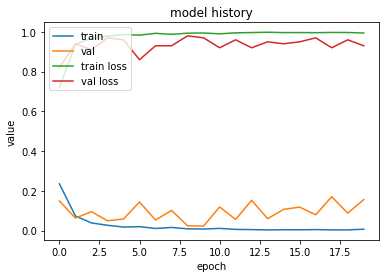

Test:
Loss: 0.15604767203330994
Accuracy: 0.9300000071525574


In [40]:
model.compile(loss='binary_crossentropy',
              optimizer='adam', metrics=['accuracy'])
hist = model.fit_generator(data,  epochs=10, verbose=1,
                           validation_data=(x_test, y_test))
loss, accuracy = model.evaluate(x_test, y_test)
plot_hist(hist)
print('Test:')
print('Loss: %s\nAccuracy: %s' % (loss, accuracy))


In [32]:
model.predict(np.array([np.zeros((50, 50, 3))]))

2022-08-28 12:53:39.471251: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 650ms/step


array([[9.9714100e-01, 1.8046845e-06, 3.6770300e-04, 2.4893894e-03,
        9.6417182e-08]], dtype=float32)

In [41]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()
with open("model.tflite", "wb") as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /var/folders/hl/fxxy2d3156l2j0q01gfmm_y00000gn/T/tmpp3lph5tk/assets


INFO:tensorflow:Assets written to: /var/folders/hl/fxxy2d3156l2j0q01gfmm_y00000gn/T/tmpp3lph5tk/assets
2022-08-28 13:45:15.926656: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-08-28 13:45:15.926668: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-08-28 13:45:15.930027: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /var/folders/hl/fxxy2d3156l2j0q01gfmm_y00000gn/T/tmpp3lph5tk
2022-08-28 13:45:15.932014: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2022-08-28 13:45:15.932019: I tensorflow/cc/saved_model/reader.cc:122] Reading SavedModel debug info (if present) from: /var/folders/hl/fxxy2d3156l2j0q01gfmm_y00000gn/T/tmpp3lph5tk
2022-08-28 13:45:15.935101: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled
2022-08-28 13:45:15.935724: I tensorflow/cc/saved_model/load

In [33]:
import cv2
from glob import glob
f_list = glob(f"./*.png")
test = []
for pic in f_list:
  img = cv2.imread(pic, cv2.IMREAD_UNCHANGED)
  img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)
  test.append(np.array(img))
  plt.imshow(img)
  plt.show()
  predict = model.predict(np.array([img]))
  print(classifications[predict.argmax()], f"{predict.max() * 100}%")
  

ModuleNotFoundError: No module named 'cv2'